In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math

In [2]:
def gen_custom_label(x):
    r = math.sqrt(x[0]**2 + x[1]**2) 
    if r < 7 :        
        return 1
    elif r < 15 :
        return 2
    elif r < 25:
        return 3    
    else:
        return 4

def gen_custom_dataset(feat_num = 2, sample_num = 5000, max_value = 30, min_value = -30):
    data, labels = [], []
    for sam in range(sample_num):
        row = []
        for feat in range(feat_num):
            row.append(random.randint(min_value , max_value))
        data.append(row)
        labels.append(gen_custom_label(row))
    return np.asarray(data),np.asarray(labels) 

In [3]:
X, Y = gen_custom_dataset()
print(np.shape(X))
print(np.shape(Y))
# print(xtr,ytr)
print('number of samples ={} and number of features = {}:'.format(np.shape(X)[0], np.shape(X)[1]))
print('\nFirst 5 samples:\n', X[:5])
print('\nFirst 5 labels:', Y[:5])

(5000, 2)
(5000,)
number of samples =5000 and number of features = 2:

First 5 samples:
 [[ -1  26]
 [ 22 -19]
 [ 13  12]
 [  3 -19]
 [ 25 -14]]

First 5 labels: [4 4 3 3 4]


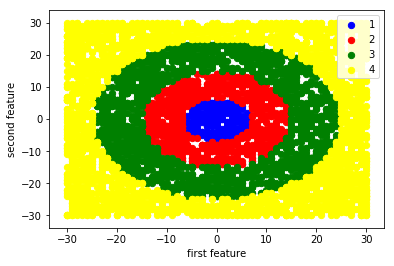

In [4]:
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], 
            c='blue', s=40, label='1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], 
            c='red', s=40, label='2')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], 
            c='green', s=40, label='3')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], 
            c='yellow', s=40, label='4')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.75,
                                                    random_state=1234,
                                                    stratify=Y)
print("num of train samples = {}".format(len(X_train)))
print("num of test samples = {}".format(len(X_test)))

num of train samples = 1250
num of test samples = 3750


In [16]:
from sklearn.neural_network import MLPClassifier
nnclf = MLPClassifier(hidden_layer_sizes = [10,5, 12], solver='lbfgs',
                     random_state = 0)

# MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
#               alpha=0.0001, batch_size='auto', learning_rate='constant', 
#               learning_rate_init=0.001, power_t=0.5, max_iter=200, 
#               shuffle=True, random_state=None, tol=0.0001, verbose=False,
#               warm_start=False, momentum=0.9, nesterovs_momentum=True,
#               early_stopping=False, validation_fraction=0.1, beta_1=0.9, 
#               beta_2=0.999, epsilon=1e-08)

training phase

In [17]:
classifier = nnclf.fit(X_train, y_train)
classifier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[10, 5, 12], learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
prediction = classifier.predict(X_test)

In [19]:
print(prediction)
print(y_test)

[4 4 3 ..., 2 4 3]
[4 4 3 ..., 2 4 3]


In [20]:
np.mean(prediction == y_test)

0.95306666666666662

In [21]:
classifier.score(X_train, y_train)

0.96319999999999995

In [22]:
classifier.score(X_test, y_test)

0.95306666666666662

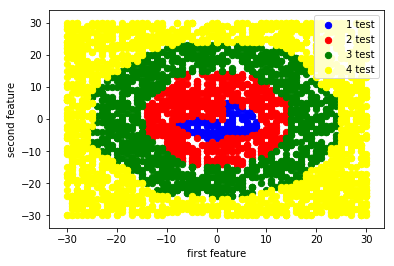

In [23]:
plt.scatter(X_test[prediction == 1, 0], X_test[prediction == 1, 1], 
            c='blue', s=40, label='1 test')
plt.scatter(X_test[prediction == 2, 0], X_test[prediction == 2, 1], 
            c='red', s=40, label='2 test')
plt.scatter(X_test[prediction == 3, 0], X_test[prediction == 3, 1], 
            c='green', s=40, label='3 test')
plt.scatter(X_test[prediction == 4, 0], X_test[prediction == 4, 1], 
            c='yellow', s=40, label='4 test')
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.legend(loc='upper right');

